# Timeseries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.options.display.max_rows = 12
pd.options.display.max_columns = 8
pd.options.display.width = 80

nice blog on Seattle bikeshare

https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/

Get the NYC data for Sept 2015

https://www.citibikenyc.com/system-data

```
unzip data/201509-citibike-tripdata.zip
```

In [2]:
!head -5 data/201509-citibike-tripdata.csv

In [3]:
df = pd.read_csv('data/201509-citibike-tripdata.csv',
                 infer_datetime_format=True, 
                 parse_dates=['starttime','stoptime'])
df

,tripduration,starttime,stoptime,start station id,...,bikeid,usertype,birth year,gender
0,288,2015-09-01 00:00:00,2015-09-01 00:04:48,263,...,15479,Subscriber,1989.0,1
1,165,2015-09-01 00:00:00,2015-09-01 00:02:45,495,...,23899,Subscriber,1987.0,1
2,367,2015-09-01 00:00:01,2015-09-01 00:06:08,3119,...,23921,Customer,NaN,0
3,926,2015-09-01 00:00:07,2015-09-01 00:15:34,536,...,23256,Subscriber,1992.0,1
4,658,2015-09-01 00:00:09,2015-09-01 00:11:07,347,...,17289,Subscriber,1976.0,1
5,392,2015-09-01 00:00:13,2015-09-01 00:06:46,2004,...,15438,Subscriber,1955.0,1
...,...,...,...,...,...,...,...,...,...
1289693,203,2015-09-30 23:58:56,2015-10-01 00:02:19,439,...,21305,Subscriber,1982.0,1
1289694,1200,2015-09-30 23:59:07,2015-10-01 00:19:07,3082,...,23295,Customer,NaN,0
1289695,1195,2015-09-30 23:59:10,2015-10-01 00:19:05,3082,...,22286,Customer,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289699 entries, 0 to 1289698
Data columns (total 15 columns):
tripduration               1289699 non-null int64
starttime                  1289699 non-null datetime64[ns]
stoptime                   1289699 non-null datetime64[ns]
start station id           1289699 non-null int64
start station name         1289699 non-null object
start station latitude     1289699 non-null float64
start station longitude    1289699 non-null float64
end station id             1289699 non-null int64
end station name           1289699 non-null object
end station latitude       1289699 non-null float64
end station longitude      1289699 non-null float64
bikeid                     1289699 non-null int64
usertype                   1289699 non-null object
birth year                 1079586 non-null float64
gender                     1289699 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 147.6+ MB


In [5]:
res = (df
   .set_index('starttime')
   .bikeid
   .resample('H')
   .count()
)
res

starttime
2015-09-01 00:00:00     313
2015-09-01 01:00:00     151
2015-09-01 02:00:00      91
2015-09-01 03:00:00      34
2015-09-01 04:00:00      47
2015-09-01 05:00:00     282
                       ... 
2015-09-30 18:00:00    4624
2015-09-30 19:00:00    3051
2015-09-30 20:00:00    2147
2015-09-30 21:00:00    1463
2015-09-30 22:00:00    1005
2015-09-30 23:00:00     670
Freq: H, dtype: int64

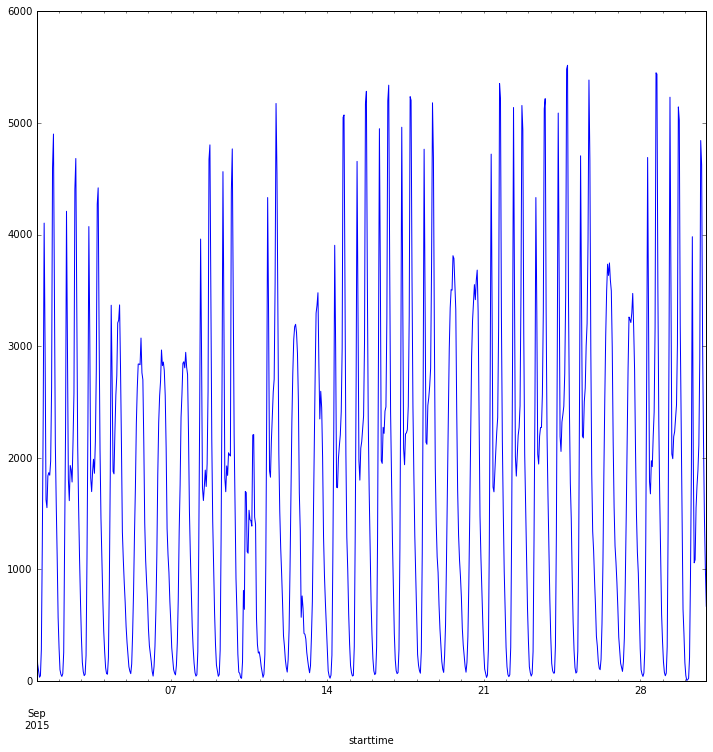

In [6]:
res.plot.line(figsize=(12,12))

In [7]:
res = (df
   .groupby([pd.Grouper(key='starttime',freq='D'),'usertype'])
   .starttime
   .count()
   .reset_index(level='usertype')
   .pivot(columns='usertype')
   .T.reset_index(level=0,drop=True).T # .reset_index(level=0,axis=1)
 )
res

usertype,Customer,Subscriber
starttime,,
2015-09-01,4846,38445
2015-09-02,4683,38542
2015-09-03,5049,37830
2015-09-04,6342,33614
2015-09-05,13052,20953
2015-09-06,14346,18853
...,...,...
2015-09-25,7189,44179
2015-09-26,11093,31467


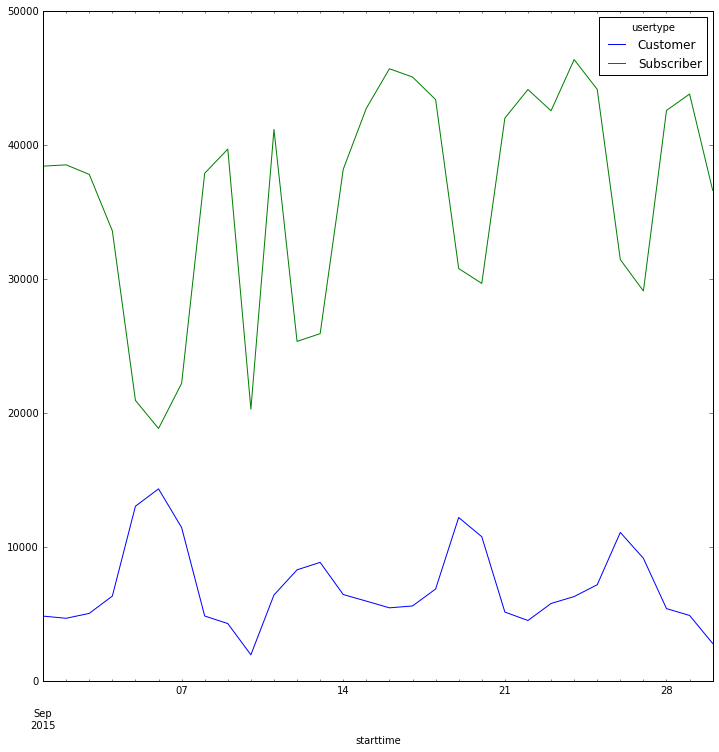

In [8]:
res.plot.line(figsize=(12,12))

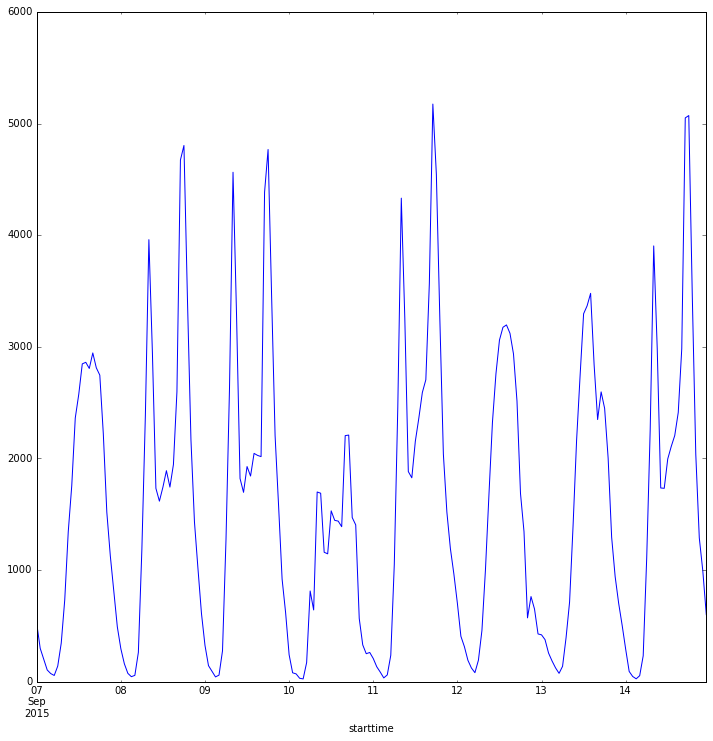

In [9]:
r = df.set_index('starttime')
(r['20150907':'20150914']
                         .bikeid
                         .resample('H')
                         .count()
                         .plot
                         .line(figsize=(12,12))
 )

# Frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects

In [10]:
i = pd.date_range('20130101 09:00:00',periods=5)
i

DatetimeIndex(['2013-01-01 09:00:00', '2013-01-02 09:00:00',
               '2013-01-03 09:00:00', '2013-01-04 09:00:00',
               '2013-01-05 09:00:00'],
              dtype='datetime64[ns]', freq='D')

In [11]:
i + pd.offsets.Hour(1)

DatetimeIndex(['2013-01-01 10:00:00', '2013-01-02 10:00:00',
               '2013-01-03 10:00:00', '2013-01-04 10:00:00',
               '2013-01-05 10:00:00'],
              dtype='datetime64[ns]', freq='D')

In [12]:
i = pd.date_range('20130101 09:00:00',periods=5,freq='MS')
i

DatetimeIndex(['2013-01-01 09:00:00', '2013-02-01 09:00:00',
               '2013-03-01 09:00:00', '2013-04-01 09:00:00',
               '2013-05-01 09:00:00'],
              dtype='datetime64[ns]', freq='MS')

In [13]:
i + pd.offsets.MonthEnd()

DatetimeIndex(['2013-01-31 09:00:00', '2013-02-28 09:00:00',
               '2013-03-31 09:00:00', '2013-04-30 09:00:00',
               '2013-05-31 09:00:00'],
              dtype='datetime64[ns]', freq='M')

In [14]:
date_range(i[0], periods=10, freq='1D10U')

DatetimeIndex([       '2013-01-01 09:00:00', '2013-01-02 09:00:00.000010',
               '2013-01-03 09:00:00.000020', '2013-01-04 09:00:00.000030',
               '2013-01-05 09:00:00.000040', '2013-01-06 09:00:00.000050',
               '2013-01-07 09:00:00.000060', '2013-01-08 09:00:00.000070',
               '2013-01-09 09:00:00.000080', '2013-01-10 09:00:00.000090'],
              dtype='datetime64[ns]', freq='86400000010U')

# Timezones

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling

In [15]:
s = Series(pd.date_range('20130101 09:00:00',periods=5,tz='US/Eastern'))
s

0   2013-01-01 09:00:00-05:00
1   2013-01-02 09:00:00-05:00
2   2013-01-03 09:00:00-05:00
3   2013-01-04 09:00:00-05:00
4   2013-01-05 09:00:00-05:00
dtype: datetime64[ns, US/Eastern]

In [16]:
s.dt.tz_convert('UTC')

0   2013-01-01 14:00:00+00:00
1   2013-01-02 14:00:00+00:00
2   2013-01-03 14:00:00+00:00
3   2013-01-04 14:00:00+00:00
4   2013-01-05 14:00:00+00:00
dtype: datetime64[ns, UTC]

In [17]:
s.astype('datetime64[ns]')

0   2013-01-01 14:00:00
1   2013-01-02 14:00:00
2   2013-01-03 14:00:00
3   2013-01-04 14:00:00
4   2013-01-05 14:00:00
dtype: datetime64[ns]

# Timedeltas

http://pandas.pydata.org/pandas-docs/stable/timedeltas.html

In [18]:
s = Series(pd.timedelta_range('1 day',periods=5,freq='2 s'))
s

0   1 days 00:00:00
1   1 days 00:00:02
2   1 days 00:00:04
3   1 days 00:00:06
4   1 days 00:00:08
dtype: timedelta64[ns]

In [19]:
s[0]

Timedelta('1 days 00:00:00')

In [20]:
# create from a date_range
dr = pd.date_range('20130101 09:00:00',periods=5,freq='MS')
dr-dr[0]

TimedeltaIndex(['0 days', '31 days', '59 days', '90 days', '120 days'], dtype='timedelta64[ns]', freq=None)

In [21]:
r = s + (dr-dr[0])
r

0     1 days 00:00:00
1    32 days 00:00:02
2    60 days 00:00:04
3    91 days 00:00:06
4   121 days 00:00:08
dtype: timedelta64[ns]

In [22]:
r.astype('timedelta64[s]')

0       86400.0
1     2764802.0
2     5184004.0
3     7862406.0
4    10454408.0
dtype: float64

In [23]:
r.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,0,0,0,0
1,32,0,0,2,0,0,0
2,60,0,0,4,0,0,0
3,91,0,0,6,0,0,0
4,121,0,0,8,0,0,0


# Resampling Part 2

In [24]:
np.random.seed(1234)
rng = pd.date_range('20130101 09:30:00',periods=1000,freq='ms')
s = Series(np.random.randn(1000)*.1+50,
           index=rng.take(np.random.randint(0,
                                            len(rng),
                                            size=len(rng))))
s

2013-01-01 09:30:00.741    50.047144
2013-01-01 09:30:00.030    49.880902
2013-01-01 09:30:00.878    50.143271
2013-01-01 09:30:00.900    49.968735
2013-01-01 09:30:00.556    49.927941
2013-01-01 09:30:00.198    50.088716
                             ...    
2013-01-01 09:30:00.391    49.944372
2013-01-01 09:30:00.905    50.027216
2013-01-01 09:30:00.297    50.093155
2013-01-01 09:30:00.282    50.032753
2013-01-01 09:30:00.731    50.074081
2013-01-01 09:30:00.679    49.919809
dtype: float64

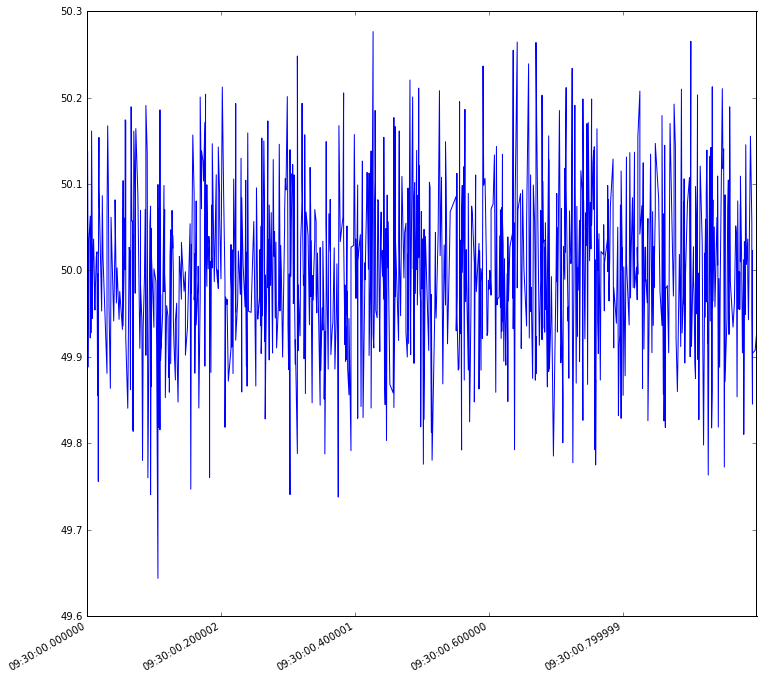

In [25]:
s.sort_index().plot(figsize=(12,12))

In [26]:
res = s.resample('1ms').ohlc()
res

,open,high,low,close
2013-01-01 09:30:00.000,50.050176,50.050176,50.050176,50.050176
2013-01-01 09:30:00.001,49.969851,50.138129,49.969851,50.138129
2013-01-01 09:30:00.002,49.888302,49.888302,49.888302,49.888302
2013-01-01 09:30:00.003,50.017030,50.035368,50.017030,50.035368
2013-01-01 09:30:00.004,NaN,NaN,NaN,NaN
2013-01-01 09:30:00.005,50.062878,50.062878,49.921889,49.921889
...,...,...,...,...
2013-01-01 09:30:00.994,NaN,NaN,NaN,NaN
2013-01-01 09:30:00.995,NaN,NaN,NaN,NaN
2013-01-01 09:30:00.996,NaN,NaN,NaN,NaN


# Missing Values

In [27]:
s.resample('1ms').ohlc().ffill()

,open,high,low,close
2013-01-01 09:30:00.000,50.050176,50.050176,50.050176,50.050176
2013-01-01 09:30:00.001,49.969851,50.138129,49.969851,50.138129
2013-01-01 09:30:00.002,49.888302,49.888302,49.888302,49.888302
2013-01-01 09:30:00.003,50.017030,50.035368,50.017030,50.035368
2013-01-01 09:30:00.004,50.017030,50.035368,50.017030,50.035368
2013-01-01 09:30:00.005,50.062878,50.062878,49.921889,49.921889
...,...,...,...,...
2013-01-01 09:30:00.994,49.845309,50.023058,49.845309,49.904009
2013-01-01 09:30:00.995,49.845309,50.023058,49.845309,49.904009
2013-01-01 09:30:00.996,49.845309,50.023058,49.845309,49.904009


# Computational Tools

http://pandas.pydata.org/pandas-docs/stable/computation.html

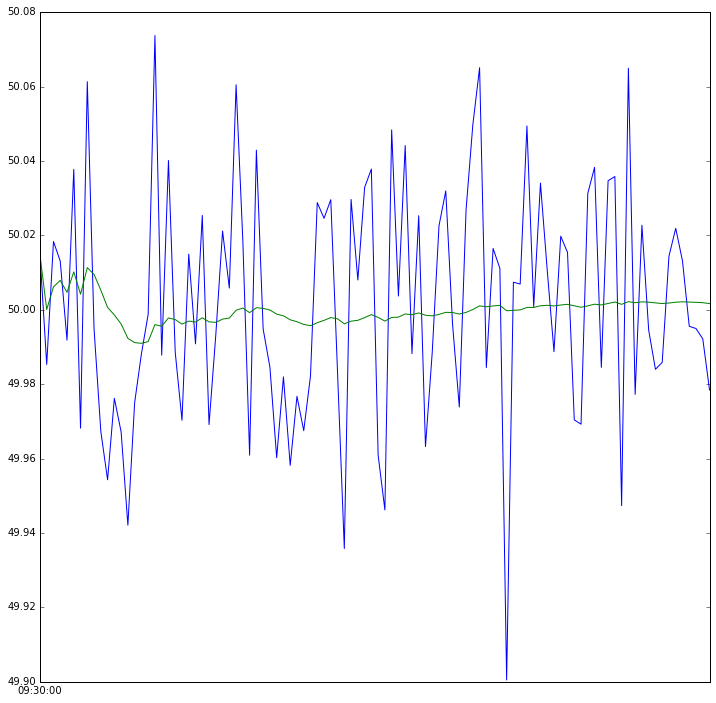

In [28]:
r = s.resample('10ms').mean()
r.rolling(window=1).mean().plot(figsize=(12,12))
r.expanding().mean().plot(figsize=(12,12))